Run the following cell to import the required packages:

In [1]:
from itertools import product
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

## Supervised Learning: Logistic Regression

---
<a class="anchor" id="log"></a>

Sources: 

https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148


https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

Logistic Regression is used when the dependent variable (target) is categorical. For example,

-to predict whether an email is spam (1) or (0)

-Whether the tumor is malignant (1) or not (0)

There are several types of logistic regressions:

1.Binary Logistic Regression

The categorical response has only two 2 possible outcomes. Example: Spam or Not

2.Multinomial Logistic Regression

Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3.Ordinal Logistic Regression

Three or more categories with ordering. Example: Movie rating from 1 to 5

We'll stick with a basic Binary Logistic Regression example for now. Suppose that you would like to predict from the number of positive cancerous lymph nodes, whether a patient will survive or not five years from now:

<img src="images/log1.png" width="400">


Or maybe taking into account two explanatory variables, age and nodes, whether a patient will survive or not:

<img src="images/log2.png" width="300">


We could use a linear regression, and label everyone above the line y = 1/2 as deceased and everyone below the line as survived. However, we would misclassify people:

<img src="images/log3.png" width="400">

A better solution would be to find a "curvier" function that has a steeper ascent and a range of only (0,1). The Sigmoid function, also known as the logistic function, will do:


<img src="images/log4.png" width="400">

When using linear regression, recall that our hypothesis function was $h(\theta_0,\theta_1) = \theta_0+\theta_1x$. 

Using logistic regression, our function will be: $h(\theta) = \frac{1}{1+e^{-(\theta_0+\theta_1x)}}$.

If this function returns a value greater than 0.5 based on an input x (the number of positive nodes), then we will label the patient as deceased. Otherwise, we'll label them as survived.

We learned about the cost function J(θ) in linear regression. The cost function represents optimization objective i.e. we create a cost function and minimize it so that we can develop an accurate model with minimum error:
$J(\theta) = \frac{1}{2n} \sum_{i=1}^n(h_{\theta}(x_i)-y^{(i)})^2$

If we try to use the cost function of the linear regression in Logistic Regression then it would be of no use as it would end up being a non-convex function with many local minimums, in which it would be very difficult to minimize the cost value and find the global minimum.

<img src="images/log5.png" width="400">

Instead, the cost function for Logistic regression will be:

<img src="images/log6.png" width="400">

<img src="images/log7.png" width="600">

The above two functions can be compressed into a single function:

<img src="images/log8.png" width="600">

Now the question arises, how do we reduce the cost value? Well, this can be done by using Gradient Descent. The main goal of Gradient Descent is to minimize the cost value, i.e., minimize J(θ).

When we take the partial derivative of the cost function and plug it into our gradient descent formula, once again we get the familiar algorithm:

<img src="images/log9.png" width="600">

You’ll note the summation term is the exact same form as the one you get when deriving gradient descent for linear regression. It is different however because in this case the hypothesis is a logistic function, not a linear one. (And as a tiny extra reason, because we no longer see the division by m out front.)

<img src="images/log10.png" width="600">

How do we get to the same form as the linear regression case??? This is NOT obvious! See the derivation here:

https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression?newreg=28a1a02102d9489caad408b4335adfc2

By the way - you will see the logistic regression equation written in several equivalent forms:


$\log(\frac{h(\theta)}{1-h(\theta)}) = \theta_0+\theta_1x$


OR:


$h(\theta) = \frac{1}{1+e^{-(\theta_0+\theta_1x)}}$

OR:

$h(\theta) = \frac{e^{\theta_0+\theta_1x}}{1+e^{\theta_0+\theta_1x}}$

Note: if you need more explanation on Logistic Regression, watch these two Andrew Ng videos:

https://www.coursera.org/learn/machine-learning/lecture/1XG8G/cost-function


https://www.coursera.org/learn/machine-learning/lecture/MtEaZ/simplified-cost-function-and-gradient-descent


We'll do the simplest example possible right now, a binary classifier for dogs with just one predictor variable (weight). Let's read the data in, where 1 corresponds to healthy and 0 corresponds to unhealthy:

In [2]:
df = pd.read_csv("data/dogweights.csv")
df.head()

,weight,health status
0,50,1
1,50,1
2,52,1
3,50,1
4,48,0


Let's create our logistic regression model and calculate its score (which returns the mean accuracy on the given test data and labels). We see that out of 20 dogs, it classifies 85% correctly, meaning only 3 dogs got classified incorrectly:

In [6]:
X = df.drop(columns = ["health status"])
y = df["health status"]

model = LogisticRegression(solver="lbfgs")
model.fit(X, y)
print(model.score(X,y))

0.85


We can view the $\theta_0$ and $\theta_1$ by typing:

In [7]:
print(model.intercept_)
print(model.coef_)

[4.3727885]
[[-0.03673668]]


### Homework 1 - Calculus Derivation

Using multivariable calculus and properties of logarithms, show that linear regression and logistic regression have nearly the same gradient descent formulas. If you need help, consult this source:


https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression?newreg=28a1a02102d9489caad408b4335adfc2


### Homework 2 - Logistic Regression Gradient Descent

Edit your previous gradient descent algorithm to now find the optimal parameters for a logistic regression with one explanatory variable.

Note that the two main things that you will have to edit are a.) the $h(\theta)$ function and b.) take the division by m (the number of points) out of your $\theta_j$ update.

To check your work, if you type ```gradient_descent(X,y, alpha= 5e-5, num_steps = 100000)``` with an initial guess of $\theta_0 = 0$ and $\theta_1 = 0$, then it should take a long time to run but it will end up giving you out approximately $\theta_0 = 3.67, \theta_1 = -0.03$, which isn't quite there yet but relatively close to the sci-kit learn values above.

0 0.00025 0.013250000000000001
1000 0.10660995286123691 0.006165723684244117
2000 0.20960972493249957 0.005048666047531617
3000 0.3092934125120364 0.0039725314773195785
4000 0.4057733874929846 0.0029355662302602073
5000 0.4991615654434853 0.001936066632931725
6000 0.5895687120204509 0.0009723842823221821
7000 0.6771038660512172 4.29297435262117e-05
8000 0.761873869247625 -0.0008538250340813338
9000 0.8439829917381519 -0.0017193453773393422
10000 0.9235326424126625 -0.0025550334407740734
11000 1.0006211533169604 -0.003362228483715037
12000 1.075343627879355 -0.004142207728097046
13000 1.1477918434911647 -0.0048961876715946425
14000 1.2180541998128025 -0.0056253257490347
15000 1.2862157050726044 -0.006330722251725226
16000 1.352357993520309 -0.007013422429282805
17000 1.4165593680584745 -0.007674418711713158
18000 1.478894862882417 -0.00831465300095823
19000 1.5394363217000357 -0.008935018990976928
20000 1.5982524877713453 -0.009536364483812359
21000 1.655409102602704 -0.0101194936761708

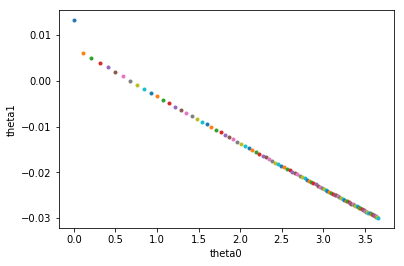

In [10]:
#new gradient descent:

def h(x,theta0,theta1):
    return 1/(1+np.exp(-(theta0+theta1*x)))

def gradient_descent(X, Y, alpha, num_steps):
    
    theta0, theta1 = 0, 0           # initial guesses

    for step in range(num_steps):
        theta0_deriv = 0
        theta1_deriv = 0

        for i in range(len(X)):
            theta0_deriv += h(X[i], theta0, theta1)-Y[i]
            theta1_deriv += (h(X[i], theta0, theta1)-Y[i])*X[i]
            
        theta0 = theta0-alpha*theta0_deriv
        theta1 = theta1-alpha*theta1_deriv
        
        if step % 1000 == 0:
            print(step, theta0,theta1)
            plt.plot(theta0,theta1,'.')

    print(f"b:{theta0}, m:{theta1}")
    plt.xlabel('theta0')
    plt.ylabel('theta1')  

X = df["weight"]
y = df["health status"]

gradient_descent(X,y, alpha= 5e-5, num_steps = 100000)

### An improvement
Note: Our algorithm is slow in part because it does not utilizie the built-in numpy data structures that speed things up. Note how much faster this algorithm runs by utilizing numpy arrays and the dot product of vectors:

In [8]:
def h(scores):
    return 1 / (1 + np.exp(-scores))

def logistic_regression(features, target, alpha, num_steps):
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))
        
    thetas = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, thetas)
        predictions = h(scores)
        
        # Update weights with gradient
        output_error_signal = predictions - target
        gradient = np.dot(features.T, output_error_signal)
        thetas -= alpha * gradient

        if step % 1000 == 0:
            print(step, thetas)
            
    print(thetas)
        
    return thetas

X = df["weight"]
y = df["health status"]
X = np.array(X)[:, np.newaxis]

logistic_regression(X, y, alpha = 5e-5, num_steps = 100000)

0 [0.00025 0.01325]
1000 [0.10660995 0.00616572]
2000 [0.20960972 0.00504867]
3000 [0.30929341 0.00397253]
4000 [0.40577339 0.00293557]
5000 [0.49916157 0.00193607]
6000 [0.58956871 0.00097238]
7000 [6.77103866e-01 4.29297435e-05]
8000 [ 0.76187387 -0.00085383]
9000 [ 0.84398299 -0.00171935]
10000 [ 0.92353264 -0.00255503]
11000 [ 1.00062115 -0.00336223]
12000 [ 1.07534363 -0.00414221]
13000 [ 1.14779184 -0.00489619]
14000 [ 1.2180542  -0.00562533]
15000 [ 1.28621571 -0.00633072]
16000 [ 1.35235799 -0.00701342]
17000 [ 1.41655937 -0.00767442]
18000 [ 1.47889486 -0.00831465]
19000 [ 1.53943632 -0.00893502]
20000 [ 1.59825249 -0.00953636]
21000 [ 1.6554091  -0.01011949]
22000 [ 1.71096901 -0.01068517]
23000 [ 1.76499227 -0.01123412]
24000 [ 1.81753625 -0.01176702]
25000 [ 1.86865578 -0.01228453]
26000 [ 1.91840319 -0.01278727]
27000 [ 1.96682851 -0.01327582]
28000 [ 2.0139795  -0.01375074]
29000 [ 2.05990178 -0.01421256]
30000 [ 2.10463896 -0.01466179]
31000 [ 2.1482327  -0.01509889]
320

array([ 3.6741061 , -0.03005978])

### A big improvement. 

Note that the the code above may have taken much quicker than the one before it but it's still MUCH slower and less accurate than the built-in sci-kit learn method:

In [9]:
X = df.drop(columns = ["health status"])
y = df["health status"]

model = LogisticRegression(solver="lbfgs")
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

[4.3727885]
[[-0.03673668]]
